## Config and Connect to drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import os
os.chdir('/content/gdrive/My Drive/Thesis/split_data')

## Import Library

In [4]:
import pickle
from matplotlib import pyplot
import numpy as np 
import timeit
#Tensorflow
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, confusion_matrix


## Read File

In [5]:
# Test file 
os.chdir('test')
(X_test, y_test) = pickle.load(open('preprocess_test.pkl','rb'))

#Traing file
os.chdir('..')
os.chdir('train')
(X_train, y_train) = pickle.load(open('preprocess_train.pkl','rb'))

# Validation file 
os.chdir('..')
os.chdir('validation')
(X_validation, y_validation) = pickle.load(open('preprocess_validation.pkl', 'rb'))


## Plot Image

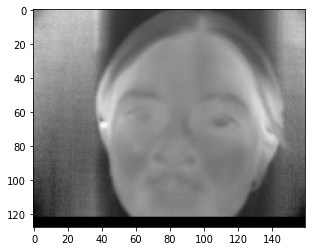

In [7]:
pyplot.imshow(X_train[1], cmap = 'gray')

## Demo

In [ ]:
# Only for X data, use np.array(y) for y data
# Returns data formatted for Keras CNN input
def cnn_data(data):
  x, y = data.shape[1:]
  return data.reshape((-1, x, y, 1))

In [ ]:
y_train = np.array([datum.flatten() for datum in y_train]) #Convert to (412,1) (samples, 1)
y_test = np.array([datum.flatten() for datum in y_test])
y_validation = np.array([datum.flatten() for datum in y_validation])

In [ ]:
from PIL import Image, ImageOps
def add_border(pil_image, border, match):
  color = ''

  if match:
    color = 'green'
  else:
    color = 'red'
  
  pil_image = pil_image.convert('RGB')

  if isinstance(border, int) or isinstance(border, tuple):
    bimg = ImageOps.expand(pil_image, border, fill = color)
  else:
    raise RuntimeError("Border is not int or tupe")
  
  return bimg

In [ ]:
def demo_model():
  print(f"Making prediction on {len(y_test)} images on test set")

  model = load_model('93_0.67.hdf5')

  start = timeit.default_timer()
  pred_y = (model.predict(cnn_data(X_test)) > 0.67).astype('int32')
  stop = timeit.default_timer()

  state = ['sober', 'drunk']
  for i, (actual, pred) in enumerate(zip(y_test, pred_y)):
    if i > 0:
      print()
      print()
    bw = Image.fromarray(X_test[i]*1500).convert('L')
    newImg = add_border(bw, 10, int(actual) == int (pred))
    display(newImg)
    print(f'Actual: {state[int(actual)]}, Predicted: {state[int(pred)]}')

  print('\nCNN Accuracy: ', accuracy_score(y_test, pred_y))
  print('CNN Confussion Matrix: \n', confusion_matrix(y_test, pred_y))
  print("The avarage time of prediction: ", (stop - start)/len(y_test))

Making prediction on 72 images on test set


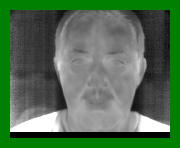

Actual: sober, Predicted: sober




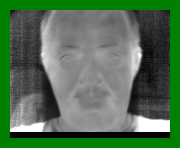

Actual: drunk, Predicted: drunk




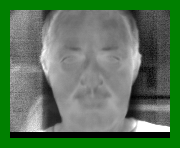

Actual: drunk, Predicted: drunk




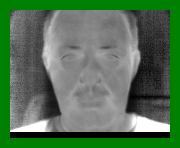

Actual: drunk, Predicted: drunk




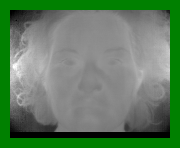

Actual: sober, Predicted: sober




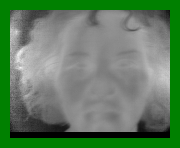

Actual: drunk, Predicted: drunk




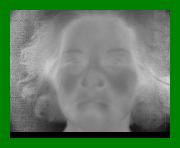

Actual: drunk, Predicted: drunk




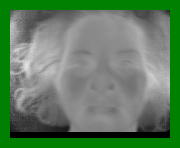

Actual: drunk, Predicted: drunk




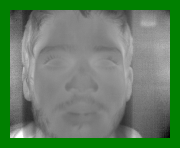

Actual: sober, Predicted: sober




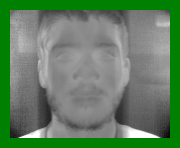

Actual: drunk, Predicted: drunk




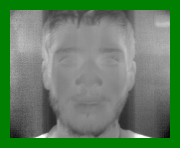

Actual: drunk, Predicted: drunk




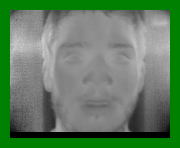

Actual: drunk, Predicted: drunk




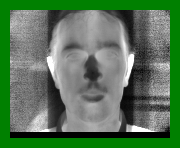

Actual: sober, Predicted: sober




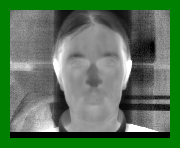

Actual: drunk, Predicted: drunk




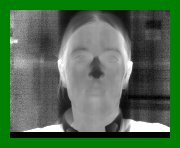

Actual: drunk, Predicted: drunk




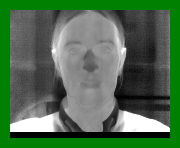

Actual: drunk, Predicted: drunk




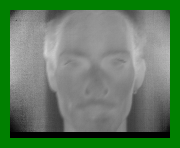

Actual: sober, Predicted: sober




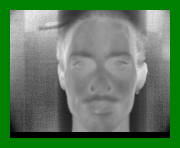

Actual: drunk, Predicted: drunk




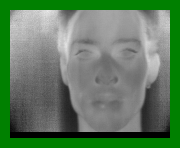

Actual: drunk, Predicted: drunk




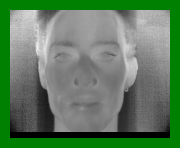

Actual: drunk, Predicted: drunk




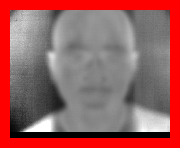

Actual: sober, Predicted: drunk




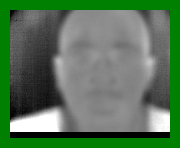

Actual: drunk, Predicted: drunk




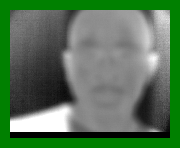

Actual: drunk, Predicted: drunk




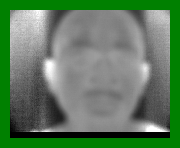

Actual: drunk, Predicted: drunk




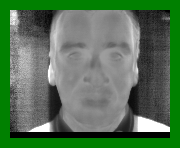

Actual: sober, Predicted: sober




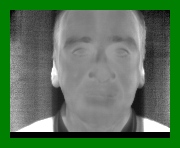

Actual: drunk, Predicted: drunk




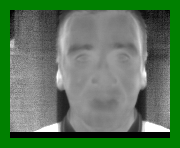

Actual: drunk, Predicted: drunk




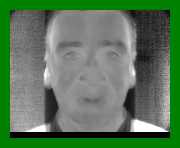

Actual: drunk, Predicted: drunk




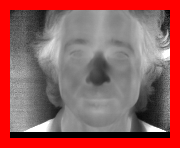

Actual: sober, Predicted: drunk




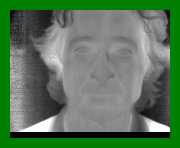

Actual: drunk, Predicted: drunk




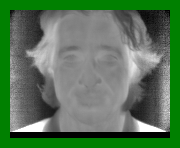

Actual: drunk, Predicted: drunk




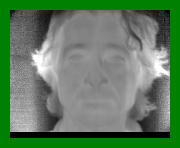

Actual: drunk, Predicted: drunk




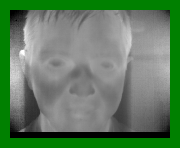

Actual: sober, Predicted: sober




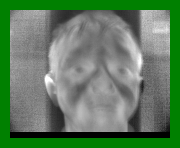

Actual: drunk, Predicted: drunk




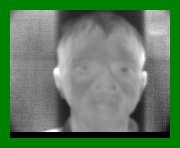

Actual: drunk, Predicted: drunk




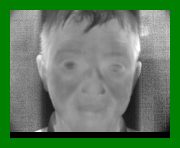

Actual: drunk, Predicted: drunk




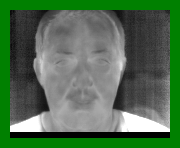

Actual: sober, Predicted: sober




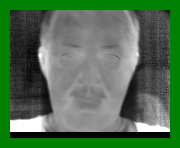

Actual: drunk, Predicted: drunk




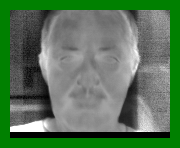

Actual: drunk, Predicted: drunk




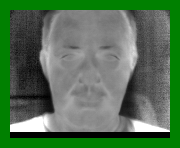

Actual: drunk, Predicted: drunk




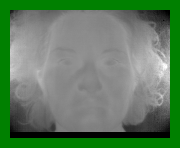

Actual: sober, Predicted: sober




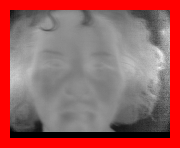

Actual: drunk, Predicted: sober




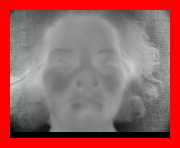

Actual: drunk, Predicted: sober




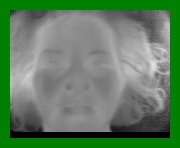

Actual: drunk, Predicted: drunk




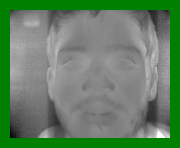

Actual: sober, Predicted: sober




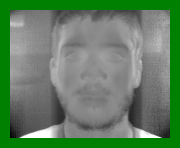

Actual: drunk, Predicted: drunk




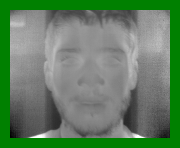

Actual: drunk, Predicted: drunk




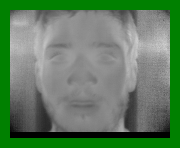

Actual: drunk, Predicted: drunk




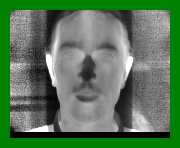

Actual: sober, Predicted: sober




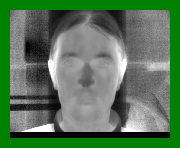

Actual: drunk, Predicted: drunk




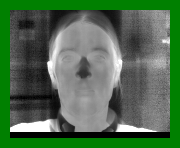

Actual: drunk, Predicted: drunk




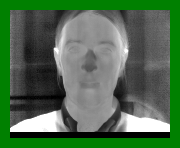

Actual: drunk, Predicted: drunk




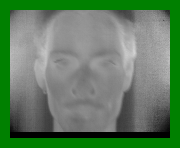

Actual: sober, Predicted: sober




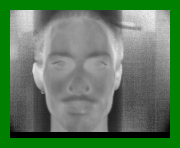

Actual: drunk, Predicted: drunk




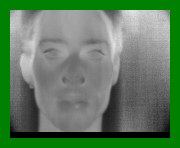

Actual: drunk, Predicted: drunk




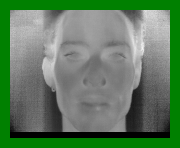

Actual: drunk, Predicted: drunk




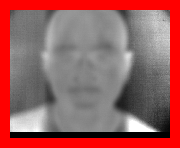

Actual: sober, Predicted: drunk




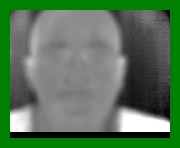

Actual: drunk, Predicted: drunk




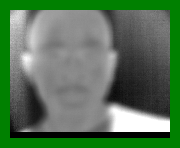

Actual: drunk, Predicted: drunk




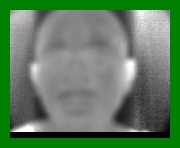

Actual: drunk, Predicted: drunk




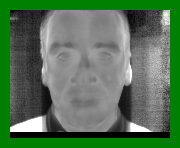

Actual: sober, Predicted: sober




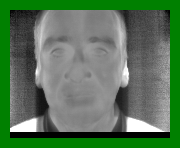

Actual: drunk, Predicted: drunk




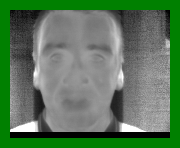

Actual: drunk, Predicted: drunk




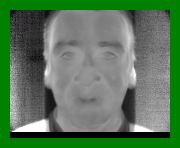

Actual: drunk, Predicted: drunk




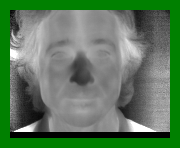

Actual: sober, Predicted: sober




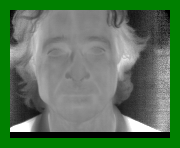

Actual: drunk, Predicted: drunk




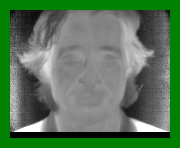

Actual: drunk, Predicted: drunk




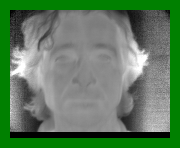

Actual: drunk, Predicted: drunk




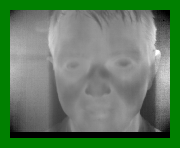

Actual: sober, Predicted: sober




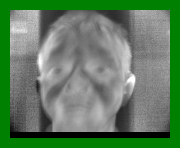

Actual: drunk, Predicted: drunk




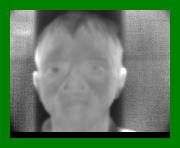

Actual: drunk, Predicted: drunk




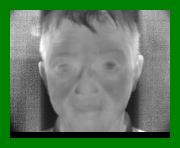

Actual: drunk, Predicted: drunk

CNN Accuracy:  0.9305555555555556
CNN Confussion Matrix: 
 [[15  3]
 [ 2 52]]
The avarage time of prediction:  0.0034880144027814217


In [ ]:
demo_model()